#SysRec Baseado em Conteúdo e Filtragem colaborativa- KDnuggets 

https://www.kdnuggets.com/2019/04/building-recommender-system.html


##Geralmente, existem dois tipos de métodos de classificação:
Filtragem baseada em conteúdo , na qual os itens recomendados são baseados na similaridade item a item e nas preferências explícitas do usuário; e
Filtragem colaborativa , na qual os itens são recomendados aos usuários com base nas preferências de outros usuários com históricos de transações e características semelhantes.
As informações usadas na filtragem colaborativa podem ser explícitas, onde os usuários fornecem classificações para cada item, ou implícitas, onde as preferências do usuário devem ser extraídas do comportamento do usuário (compras, visualizações etc.). Os sistemas de recomendação mais bem-sucedidos usam abordagens híbridas que combinam os dois métodos de filtragem.


#Filtragem simples baseada em conteúdo
Vamos construir um sistema de recomendação simples que use filtragem baseada em conteúdo (ou seja, similaridade de itens) para recomendar filmes para assistirmos. Primeiro, carregue o conjunto de dados do filme do MovieLens e faça a codificação múltipla dos campos de gênero:



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns



In [2]:
products = pd.read_csv("/content/VendaNotaFiscalClienteProduto_Abr2017_Abr2021_AF.csv",sep=';')

products

,idCliente,DataNascimento,TipoPessoa,Sexo,Loja,SerieNF,NotaFiscal,DataNF,idProduto,NomeProduto,CodigoDepartamento,Departamento,CodigoCategoria,Categoria,CodigoFamilia,Familia,"qtdVendida,"
0,58899,NaN,F,M,1,01E,8653,22/06/2017 00:00,17565,ARMACAO PRADA 05SV 2AU1O1 55,1300_0002,1.0.Otica,1301_0002,1.1.Armacao,1302_0229,PRADA,"1.000,"
1,58899,NaN,F,M,1,01E,8653,22/06/2017 00:00,31367,LT VARILUX CONFORT 360 ORMA TRIO EASY CLEAN,NaN,NaN,NaN,NaN,NaN,NaN,"2.000,"
2,55082,NaN,F,M,1,01F,8203,01/04/2017 00:00,20387,ARMACAO NEXT MMBQ1354P 5417 C2,1300_0002,1.0.Otica,1301_0002,1.1.Armacao,1302_0193,NEXT,"1.000,"
3,55082,NaN,F,M,1,01F,8203,01/04/2017 00:00,8150,PROG HI VISION CR-39,NaN,NaN,NaN,NaN,NaN,NaN,"2.000,"
4,55082,NaN,F,M,1,01F,8203,01/04/2017 00:00,21304,TRATAMENTO LIGHT GREEN,NaN,NaN,NaN,NaN,NaN,NaN,"2.000,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250385,106449,NaN,F,M,16,01C,1092,27/06/2020 00:00,51872,ARMACAO NEXT MMJ1761 C2 56,1300_0002,1.0.Otica,1301_0002,1.1.Armacao,1302_0193,NEXT,"1.000,"
250386,106449,NaN,F,M,16,01C,1092,27/06/2020 00:00,14649,LT HI VISION 1. 50 AR,NaN,NaN,NaN,NaN,NaN,NaN,"2.000,"
250387,106913,NaN,F,F,16,01C,1093,20/07/2020 00:00,51884,ARMACAO NEXT MMBQ1276P C1 52,1300_0002,1.0.Otica,1301_0002,1.1.Armacao,1302_0193,NEXT,"1.000,"
250388,106913,NaN,F,F,16,01C,1093,20/07/2020 00:00,14889,LT HI VISION 1.50 SURFACADA,NaN,NaN,NaN,NaN,NaN,NaN,"2.000,"


In [3]:
conteudo = products[['NomeProduto','Familia']]
#conteudo=conteudo[(products['CodigoFamilia']!='_') &(products['CodigoCategoria']!='_')&(products['CodigoDepartamento']!='_')]
conteudo

,NomeProduto,Familia
0,ARMACAO PRADA 05SV 2AU1O1 55,PRADA
1,LT VARILUX CONFORT 360 ORMA TRIO EASY CLEAN,NaN
2,ARMACAO NEXT MMBQ1354P 5417 C2,NEXT
3,PROG HI VISION CR-39,NaN
4,TRATAMENTO LIGHT GREEN,NaN
...,...,...
250385,ARMACAO NEXT MMJ1761 C2 56,NEXT
250386,LT HI VISION 1. 50 AR,NaN
250387,ARMACAO NEXT MMBQ1276P C1 52,NEXT
250388,LT HI VISION 1.50 SURFACADA,NaN


In [4]:
conteudo.describe()

,NomeProduto,Familia
count,250390,109597
unique,25882,165
top,TRATAMENTO LIGHT GREEN,RAY BAN
freq,12216,16703


In [5]:
conteudo = conteudo.drop_duplicates()
conteudo

,NomeProduto,Familia
0,ARMACAO PRADA 05SV 2AU1O1 55,PRADA
1,LT VARILUX CONFORT 360 ORMA TRIO EASY CLEAN,NaN
2,ARMACAO NEXT MMBQ1354P 5417 C2,NEXT
3,PROG HI VISION CR-39,NaN
4,TRATAMENTO LIGHT GREEN,NaN
...,...,...
250372,ARMACAO NEXT MMBQ1051P C3 52,NEXT
250374,LT ZEISS ENERGIZEME DIGITAL 1.74 BLUEPROTECT,NaN
250381,ARMACAO NEXT MMJ1761 C3 56,NEXT
250385,ARMACAO NEXT MMJ1761 C2 56,NEXT


In [6]:
conteudo = conteudo.dropna()
conteudo

,NomeProduto,Familia
0,ARMACAO PRADA 05SV 2AU1O1 55,PRADA
2,ARMACAO NEXT MMBQ1354P 5417 C2,NEXT
5,ARMACAO RAY BAN 7108L 2000 53,RAY BAN
9,ARMACAO ARMANI EXCHANGE* 3026L 8173 52,ARMANI EXCHANGE
14,ARMACAO MAX & CO. 165/K4X,MAX & CO.
...,...,...
250220,OCULOS GIVENCHY 7111S 807 999O,GIVENCHY
250372,ARMACAO NEXT MMBQ1051P C3 52,NEXT
250381,ARMACAO NEXT MMJ1761 C3 56,NEXT
250385,ARMACAO NEXT MMJ1761 C2 56,NEXT


In [7]:
conteudo.nunique()

NomeProduto    24305
Familia          165
dtype: int64

In [8]:
conteudo = conteudo.sort_values(['NomeProduto'])
conteudo



,NomeProduto,Familia
159430,ARMACAO GUESS 2790 001 56,GUESS
175313,ARMACAO BURBERRY 2289 3773 53,BURBERRY
69136,ARMACAO GUESS 2652 001 50,GUESS
89068,ARMACAO GUESS 2678 001 52,GUESS
157313,ARMACAO SALVATORE FERRAGAMO 2764 646 51,CHLOE
...,...,...
7921,VISEIRA DIOR CLUB1 0H3 0108,GERAL
97751,VISEIRA DIOR CLUB1 ECG 0006,GERAL
97712,VISEIRA DIOR CLUB1 G0Y 0007,GERAL
219001,VISEIRA DIOR CLUB1 J0F 0002,GERAL


In [9]:
conteudo['Familia'].value_counts().head(30)

RAY BAN              1639
VOGUE                 910
NEXT                  896
CARRERA               680
PRADA                 677
DIOR                  659
LACOSTE               625
EMPORIO ARMANI        559
DOLCE&GABBANA         520
FENDI                 504
CALVIN KLEIN          491
RALPH LAUREN          454
TOMMY HILFIGER        444
POLAROID              440
ARMANI EXCHANGE       434
VERSACE               430
OAKLEY                420
ARNETTE               415
GRAZI MASSAFERA       411
POLO RALPH LAUREN     410
MICHAEL KORS          398
CHLOE                 363
TIFFANY               358
ANA HICKMANN          357
DELUXE                322
GUCCI                 298
MIU MIU               297
MARC JACOBS           294
PERSOL                283
SABRINA SATO          282
Name: Familia, dtype: int64

In [10]:
#conteudo = conteudo.sort_values(by='NomeProduto', ascending=True)
conteudo = conteudo.sort_index()
conteudo

,NomeProduto,Familia
0,ARMACAO PRADA 05SV 2AU1O1 55,PRADA
2,ARMACAO NEXT MMBQ1354P 5417 C2,NEXT
5,ARMACAO RAY BAN 7108L 2000 53,RAY BAN
9,ARMACAO ARMANI EXCHANGE* 3026L 8173 52,ARMANI EXCHANGE
14,ARMACAO MAX & CO. 165/K4X,MAX & CO.
...,...,...
250220,OCULOS GIVENCHY 7111S 807 999O,GIVENCHY
250372,ARMACAO NEXT MMBQ1051P C3 52,NEXT
250381,ARMACAO NEXT MMJ1761 C3 56,NEXT
250385,ARMACAO NEXT MMJ1761 C2 56,NEXT


In [11]:
n = 3
lista = conteudo['Familia'].value_counts()[:n].index.tolist()
lista

['RAY BAN', 'VOGUE', 'NEXT']

In [12]:
conteudo = conteudo.loc[conteudo['Familia'].isin(lista)]
conteudo

,NomeProduto,Familia
2,ARMACAO NEXT MMBQ1354P 5417 C2,NEXT
5,ARMACAO RAY BAN 7108L 2000 53,RAY BAN
18,OCULOS RAY BAN 4171L 86513 54,RAY BAN
24,OCULOS RAY BAN 4207 60158G 55,RAY BAN
30,ARMACAO VOGUE* 2904BL 2230 53,VOGUE
...,...,...
249761,OCULOS NEXT MMBQ1338S 5017 C1,NEXT
250372,ARMACAO NEXT MMBQ1051P C3 52,NEXT
250381,ARMACAO NEXT MMJ1761 C3 56,NEXT
250385,ARMACAO NEXT MMJ1761 C2 56,NEXT


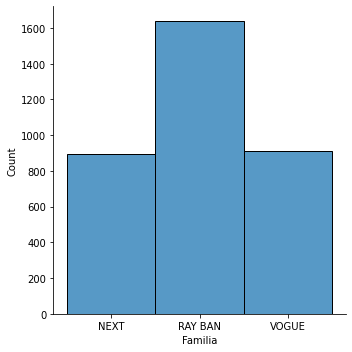

In [13]:
sns.displot(conteudo['Familia'])

In [14]:
print(conteudo['NomeProduto'].value_counts())

ARMACAO RAY BAN 6386 2500 53     1
OCULOS VOGUE 5302SL 286113 54    1
OCULOS VOGUE* 2846SB W4411 57    1
ARMACAO RAY BAN 6345 2595 52     1
ARMACAO RAY BAN 7044L 2000 52    1
                                ..
ARMACAO VOGUE 5218L W44 52       1
ARMACAO VOGUE 5256L 2695 53      1
OCULOS RAY BAN 3386 11213 63     1
ARMACAO VOGUE* 5072L 2462 53     1
OCULOS RAY BAN 4298 60171 57     1
Name: NomeProduto, Length: 3445, dtype: int64


In [15]:
#one_hot = pd.get_dummies(products_conteudo, columns = ['Categoria'])
one_hot = conteudo.join(pd.get_dummies(conteudo['Familia']))
#one_hot = pd.DataFrame(one_hot)
one_hot

,NomeProduto,Familia,NEXT,RAY BAN,VOGUE
2,ARMACAO NEXT MMBQ1354P 5417 C2,NEXT,1,0,0
5,ARMACAO RAY BAN 7108L 2000 53,RAY BAN,0,1,0
18,OCULOS RAY BAN 4171L 86513 54,RAY BAN,0,1,0
24,OCULOS RAY BAN 4207 60158G 55,RAY BAN,0,1,0
30,ARMACAO VOGUE* 2904BL 2230 53,VOGUE,0,0,1
...,...,...,...,...,...
249761,OCULOS NEXT MMBQ1338S 5017 C1,NEXT,1,0,0
250372,ARMACAO NEXT MMBQ1051P C3 52,NEXT,1,0,0
250381,ARMACAO NEXT MMJ1761 C3 56,NEXT,1,0,0
250385,ARMACAO NEXT MMJ1761 C2 56,NEXT,1,0,0


In [16]:
one_hot.dtypes

NomeProduto    object
Familia        object
NEXT            uint8
RAY BAN         uint8
VOGUE           uint8
dtype: object

In [17]:
one_hot = one_hot.iloc[:,2:]
one_hot=one_hot.astype('int64')
one_hot.dtypes

NEXT       int64
RAY BAN    int64
VOGUE      int64
dtype: object

O recurso gênero consiste em um ou mais gêneros separados por barras verticais (“|”). A última linha acima adiciona uma coluna para cada gênero possível e coloca 1 nessa entrada se a etiqueta de gênero estiver presente, ou 0 caso contrário.

Vamos gerar algumas recomendações com base na similaridade do item usando essas tags. Uma medida de similaridade muito comum para dados categóricos (como tags) é a similaridade de cosseno . Para quaisquer dois itens eue j, a similaridade do cosseno de eue jé simplesmente o cosseno do ângulo entre eue jonde eue jsão interpretados como vetores no espaço de recursos. Lembre-se de que o cosseno é obtido a partir do produto interno desses vetores:
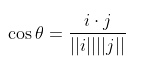 

Como um exemplo concreto, considere os filmes $ i: = $ Toy Story (tags de gênero “Aventura”, “Animação”, “Crianças”, “Comédia” e “Fantasia”) e $ j: = $ Jumanji (tags de gênero “ Aventura ”,“ Crianças ”e“ Fantasia ”). O produto escalar i.j é 3 (os dois filmes têm três marcas em comum), 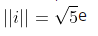 e image.png, portanto, a semelhança de cosseno entre esses dois filmes é: 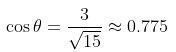

Podemos calcular a semelhança do cosseno para todos os itens em nosso conjunto de dados:

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# compute the cosine similarity
cos_sim = cosine_similarity(one_hot)
cos_sim
df=pd.DataFrame(cos_sim)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3405,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438,3439,3440,3441,3442,3443,3444
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3441,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3442,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3443,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


##Vamos descobrir quais são os produtos semelhantes para o primeiro produto:


In [17]:
# Let's get the top 5 most similar product:
toystory_top5 = np.argsort(cos_sim[0])[-5:][::-1]

toystory_top5


array([   0, 4033, 1609, 1608,  669])

Todos os primeiros cinco filmes têm exatamente as mesmas marcas de gênero que Toy Story e, portanto, uma semelhança de cosseno de 1. Na verdade, para os dados de amostra usados ​​aqui, há treze filmes com semelhança 1; o filme mais semelhante sem tags idênticas é “The Ant Bully” de 2006, que tem a tag de gênero adicional “IMAX”.

#Filtragem Colaborativa Simples
A filtragem colaborativa recomenda itens com base no que usuários semelhantes gostaram. Felizmente, no conjunto de dados MovieLens, temos uma riqueza de informações de preferência do usuário na forma de classificações de filmes: cada usuário atribui a um ou mais filmes classificações numéricas entre 1 e 5, indicando o quanto eles gostaram do filme. Podemos ver o problema de recomendar itens ao usuário como uma tarefa de previsão : dadas as avaliações do usuário de outros filmes, qual é a sua provável avaliação do filme em questão?

Uma maneira simples de fazer isso é atribuir uma classificação ponderada por similaridade a cada item usando as classificações de outros usuários:
![image.png]()

Para nossa medição de similaridade de usuários, veremos as avaliações dos usuários sobre os filmes. Usuários com classificações semelhantes serão considerados semelhantes. Para trabalhar com esses dados de classificação, uma primeira etapa importante é normalizar nossas classificações. Faremos isso em três etapas: primeiro, subtrairemos a classificação média geral (em todos os filmes e usuários) para que nossas classificações ajustadas fiquem centradas em 0. Em seguida, faremos a mesma coisa para cada filme, para conta para as classificações médias de um determinado filme diferente. Finalmente, subtrairemos a classificação média de cada usuário - isso leva em conta as variações individuais (por exemplo, um usuário dando classificações consistentemente mais altas do que outro).
##Vamos carregar os dados de classificações e calcular as classificações ajustadas:

In [22]:
ratings = pd.read_csv("/content/VendaAgregadaPorClienteEProduto_Abr2017_Abr2021_AF.csv",sep=';')

ratings

,idCliente,DataNascimento,TipoPessoa,Sexo,idProduto,NomeProduto,CodigoDepartamento,Departamento,CodigoCategoria,Categoria,CodigoFamilia,Familia,qtdVendida,"qtdVendas,"
0,4,15/06/1973 00:00,F,F,18517,OCULOS VOGUE 5021BL W65613 57,1300_0002,1.0.Otica,1301_0001,1.2.Solar,1302_0285,VOGUE,1.0,"1,"
1,4,15/06/1973 00:00,F,F,30152,ARMACAO MARC JACOBS 188 807 5416,1300_0002,1.0.Otica,1301_0002,1.1.Armacao,1302_0167,MARC JACOBS,1.0,"1,"
2,6,NaN,J,M,32900,OCULOS NIKE TRAINER EV0934 061,1300_0002,1.0.Otica,1301_0001,1.2.Solar,1302_0195,NIKE,1.0,"1,"
3,9,NaN,J,M,28422,OCULOS RAY BAN 3647N 00157 51,1300_0002,1.0.Otica,1301_0001,1.2.Solar,1302_0001,RAY BAN,1.0,"1,"
4,9,NaN,J,M,31639,OCULOS RAY BAN 3447L 001 53,1300_0002,1.0.Otica,1301_0001,1.2.Solar,1302_0001,RAY BAN,1.0,"1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224833,116532,NaN,F,F,51146,OCULOS VERSACE 4377 GB187 52,1300_0002,1.0.Otica,1301_0001,1.2.Solar,1302_0279,VERSACE,1.0,"1,"
224834,116536,NaN,F,F,42530,CAIXA ZEISS LENS WIPES 30 UND,1300_0002,1.0.Otica,1301_0004,1.5.Acessorios,1302_0297,GERAL,1.0,"1,"
224835,116540,NaN,F,F,41447,LT HI-VISION 1.56 FILTER BLUE,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"1,"
224836,116541,NaN,F,F,54625,ARMACAO LONGCHAMP 2608 214 51,1300_0002,1.0.Otica,1301_0002,1.1.Armacao,1302_0446,LONGCHAMP,1.0,"1,"


In [ ]:
mean_rating = ratings['rating'].mean() # compute mean rating

pref_matrix1 = ratings[['userId', 'movieId', 'rating']].pivot(index='userId', columns='movieId', values='rating')
pref_matrix2 = pref_matrix1 - mean_rating # adjust by overall mean

item_mean_rating = pref_matrix2.mean(axis=0)
pref_matrix3 = pref_matrix2 - item_mean_rating # adjust by item mean

user_mean_rating = pref_matrix3.mean(axis=1)
pref_matrix = pref_matrix3 - user_mean_rating
pref_matrix

##Neste ponto, podemos estabelecer facilmente uma estimativa de linha de base razoável para a classificação de um determinado usuário de filmes que ele não viu:

In [ ]:
pref_matrix.fillna(0) + user_mean_rating + item_mean_rating + mean_rating

##Podemos calcular a distância de um determinado usuário (neste caso, usuário 0) da seguinte maneira:



In [ ]:
mat = pref_matrix.values
k = 0 # use the first user
np.nansum((mat - mat[k,:])**2,axis=1).reshape(-1,1)

##Acontece que o usuário mais próximo é o usuário 12 (com distância 0):





---



In [ ]:
np.nansum((mat - mat[0,:])**2,axis=1)[1:].argmin() # returns 11
# check it:
np.nansum(mat[12] - mat[0]) # returns 0.0

##Encontramos dois filmes que o usuário 12 viu e que o usuário 0 não:



In [ ]:
np.where(~np.isnan(mat[12]) & np.isnan(mat[0]) == True)
# returns (array([304, 596]),)

mat[12][[304, 596]]
# returns array([-2.13265214, -0.89476547])

##Infelizmente, o usuário 12 não gosta de ambos os filmes que o usuário 0 ainda não viu! Devemos continuar nosso cálculo para contabilizar todos os usuários próximos.

##Observações Finais
Os métodos usados ​​neste post são baseados na vizinhança , e acabamos de ver acima uma armadilha potencial ao gerar recomendações baseadas em vizinhos: os vizinhos podem não recomendar nenhum item que o usuário em questão ainda não tenha visto. Devido à necessidade de calcular distâncias entre pares, os métodos baseados na vizinhança também tendem a ter uma escala insuficiente conforme o número de usuários aumenta.

Na parte 2 desta série, daremos uma olhada em outra abordagem para construir sistemas de recomendação, desta vez usando métodos de fator latente . Os modelos de fator latente evitam algumas das armadilhas dos métodos baseados na vizinhança descritos aqui - mas, como veremos, eles vêm com alguns desafios próprios!